In [26]:
import io
import requests 
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"
    
    response = requests.post(url)
    f = io.StringIO(response.text)
    df = pd.read_csv(f , index_col="Date" , parse_dates=['Date'])
    return df

In [3]:
for number , letter in zip([1,2,3] , ['a','b','c']):
    print(number , letter)

1 a
2 b
3 c


In [12]:
def crawl_world_indice():
    url = "https://finance.yahoo.com/world-indices/"
    response = requests.get(url)
    f = io.StringIO(response.text)
    df = pd.read_html(f)
    return df[0]  #就只有這個哈哈
d = crawl_world_indice()
d.head()

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,2744.73,+34.93,+1.29%,2.29B,NaN,NaN,NaN
1,^DJI,Dow 30,25425.76,+372.65,+1.49%,278.115M,NaN,NaN,NaN
2,^IXIC,Nasdaq,7414.62,+106.71,+1.46%,1.926B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),12438.44,+140.54,+1.14%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2490.14,+14.73,+0.59%,0,NaN,NaN,NaN


In [18]:
data = crawl_world_indice()
world_indice_history = {}
for  symbol , name in zip(data['Symbol'] , data['Name']):
    print(name)
    world_indice_history[name] = crawl_price(symbol)
    time.sleep(5)

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
IPSA SANTIAGO DE CHILE
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


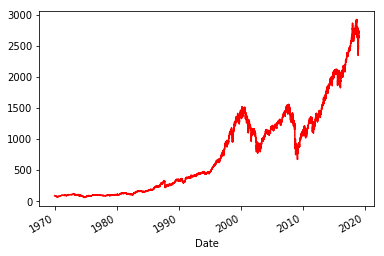

In [22]:
sp500 = world_indice_history['S&P 500']['Adj Close']
sp500.plot(color = 'red')

In [23]:
adjclose = {}
for name , index in world_indice_history.items():
    adjclose[name] = index['Adj Close']
adjclose = pd.DataFrame(adjclose)
adjclose.head()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,IPSA SANTIAGO DE CHILE,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cor = adjclose.corr()
print(cor)

                            S&P 500    Dow 30    Nasdaq  NYSE COMPOSITE (DJ)  \
S&P 500                    1.000000  0.994984  0.979658             0.985375   
Dow 30                     0.994984  1.000000  0.969427             0.980450   
Nasdaq                     0.979658  0.969427  1.000000             0.938930   
NYSE COMPOSITE (DJ)        0.985375  0.980450  0.938930             1.000000   
NYSE AMEX COMPOSITE INDEX  0.736619  0.788612  0.682502             0.886377   
Cboe UK 100 Price Return   0.904349  0.894431  0.882062             0.946171   
Russell 2000               0.969489  0.979098  0.956137             0.960197   
Vix                       -0.174716 -0.160427 -0.191932            -0.162568   
FTSE 100                   0.934225  0.922186  0.867232             0.955483   
DAX PERFORMANCE-INDEX      0.978665  0.971997  0.962902             0.964770   
CAC 40                     0.781860  0.751134  0.714043             0.811907   
ESTX 50 PR.EUR             0.744615  0.7

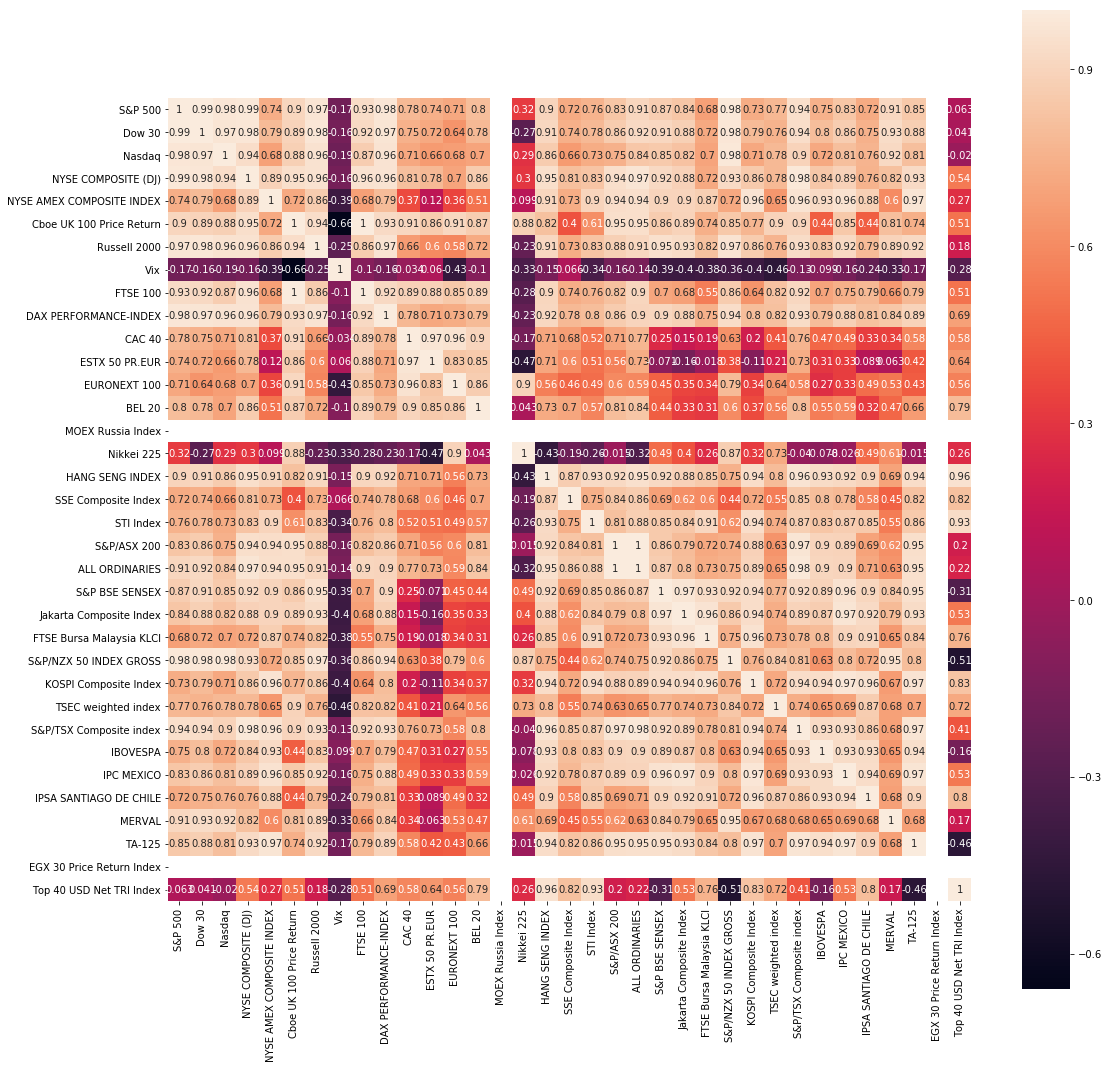

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,18)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, square=True ,vmax=1.0, linecolor='white', annot=True)

In [37]:
adjclose.corr() > 0.9

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,IPSA SANTIAGO DE CHILE,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
S&P 500,True,True,True,True,False,True,True,False,True,True,...,False,False,True,False,False,False,True,False,False,False
Dow 30,True,True,True,True,False,False,True,False,True,True,...,False,False,True,False,False,False,True,False,False,False
Nasdaq,True,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
NYSE COMPOSITE (DJ),True,True,True,True,False,True,True,False,True,True,...,False,False,True,False,False,False,False,True,False,False
NYSE AMEX COMPOSITE INDEX,False,False,False,False,True,False,False,False,False,False,...,True,False,True,True,True,False,False,True,False,False
Cboe UK 100 Price Return,True,False,False,True,False,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False
Russell 2000,True,True,True,True,False,True,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
Vix,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
FTSE 100,True,True,False,True,False,True,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
DAX PERFORMANCE-INDEX,True,True,True,True,False,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False


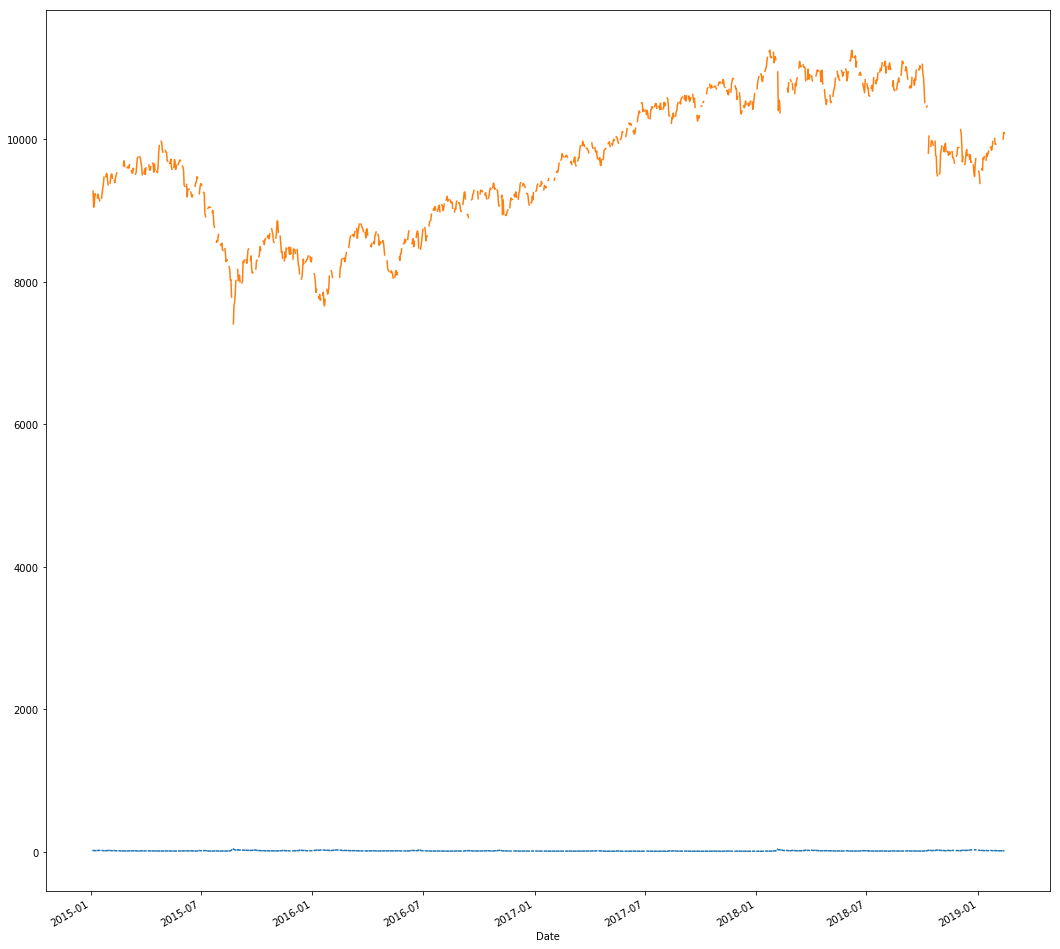

In [39]:
#adjclose['Cboe UK 100 Price Return']['2015':].plot()
adjclose['Vix']['2015':].plot()
adjclose['TSEC weighted index']['2015':].plot()